# Load required packages and data

In [1]:
library(Seurat)
library(future)
library(ggplot2)
library(SeuratDisk)
library(here)
library(tidyverse)
library(dplyr)

mouse_panel = read.csv('/projects/pfenninggroup/spatial/resources/panels/original_mouse_brain_markers.csv')

colors_new_labels = c('#0075DC','#993F00','#4C005C','#191919',         '#2BCE48','#FFCC99'        ,'#94FFB5','#8F7C00','#9DCC00',
         '#C20088','#003380','#FFA405',         '#FFA8BB','#426600','#FF0010')

save = TRUE

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

here() starts at /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [17]:
library(ggridges)
library(ggplot2)

In [2]:
main_path = '/projects/pfenninggroup/spatial/seal/mouse_spinal_cord_xenium_first_run/'
saline_data = paste0(main_path, 'output-XETG00176__0010684__SALINE__20231107__233200')
xenium.obj <- LoadXenium(saline_data, fov = "fov")
xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 0)

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warn

In [3]:
# ## run below to label the project

top_annotation <- readRDS("/projects/pfenninggroup/spatial/seal/mouse_spinal_cord_xenium_first_run/rdas/first_run_saline_top_annotation.rds")
subtype_annotation <- readRDS("/projects/pfenninggroup/spatial/seal/mouse_spinal_cord_xenium_first_run/rdas/first_run_saline_subtype_annotation.rds")

xenium.obj$top_annotation = top_annotation
xenium.obj$subtype_annotation = subtype_annotation

In [4]:
dplyr::glimpse(xenium.obj[[]])

Rows: 49,620
Columns: 11
$ orig.ident               <fct> SeuratProject, SeuratProject, SeuratProject, …
$ nCount_Xenium            <dbl> 12, 89, 86, 88, 100, 360, 230, 244, 321, 129,…
$ nFeature_Xenium          <int> 10, 37, 35, 37, 43, 77, 52, 57, 63, 49, 24, 4…
$ nCount_BlankCodeword     <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, …
$ nFeature_BlankCodeword   <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, …
$ nCount_ControlCodeword   <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ nFeature_ControlCodeword <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ nCount_ControlProbe      <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ nFeature_ControlProbe    <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ top_annotation           <fct> Schwann Cells, Schwann Cells, Leptomeninges, …
$ subtype_annotation       <chr> "Schwann Cells", "Schwann Cells", "Leptomenin…


Run basic spatial omics workflow to find xenium clusters

In [5]:
xenium.obj <- SCTransform(xenium.obj, assay = "Xenium")
xenium.obj <- RunPCA(xenium.obj, npcs = 30, features = rownames(xenium.obj))
xenium.obj <- RunUMAP(xenium.obj, dims = 1:30)
xenium.obj <- FindNeighbors(xenium.obj, reduction = "pca", dims = 1:30)
xenium.obj <- FindClusters(xenium.obj, resolution = 2)

Running SCTransform on assay: Xenium

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 247 by 49620

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 247 genes, 5000 cells

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Fou

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 49620
Number of edges: 1799801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8604
Number of communities: 44
Elapsed time: 13 seconds


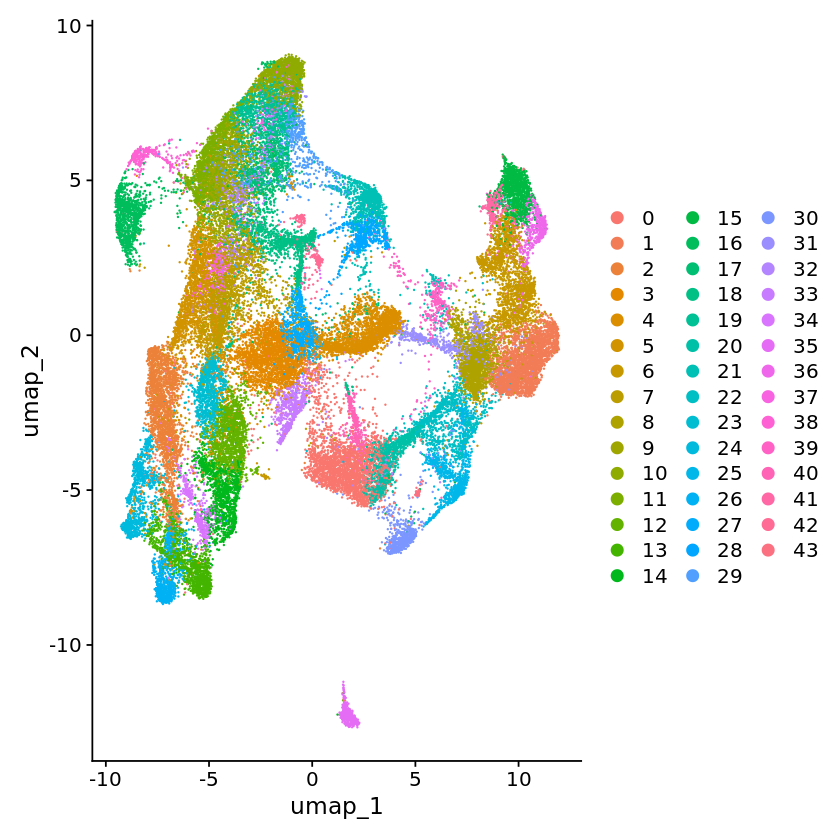

In [6]:
DimPlot(xenium.obj)

# Get the CHAT expression values across the Xenium clusters

In [13]:
sub_xen <- data.frame(Cluster = xenium.obj$seurat_clusters)

In [14]:
sub_xen

,Cluster
,<fct>
aaaaiehf-1,15
aaadggng-1,6
aaaeecmb-1,8
aaaegbdd-1,36
aaagakge-1,6
aaaimalc-1,21
aaaimkdl-1,8
aaajkfgn-1,4
aaakjmog-1,8


In [15]:
sub_xen$Chat <- xenium.obj[['SCT']]$data['Chat', ]

In [16]:
sub_xen

,Cluster,Chat
,<fct>,<dbl>
aaaaiehf-1,15,0
aaadggng-1,6,0
aaaeecmb-1,8,0
aaaegbdd-1,36,0
aaagakge-1,6,0
aaaimalc-1,21,0
aaaimkdl-1,8,0
aaajkfgn-1,4,0
aaakjmog-1,8,0


# Plot a ridge plot and violin plot to visualize clusters with high Chat expression in the Xenium data

Picking joint bandwidth of 0.0511



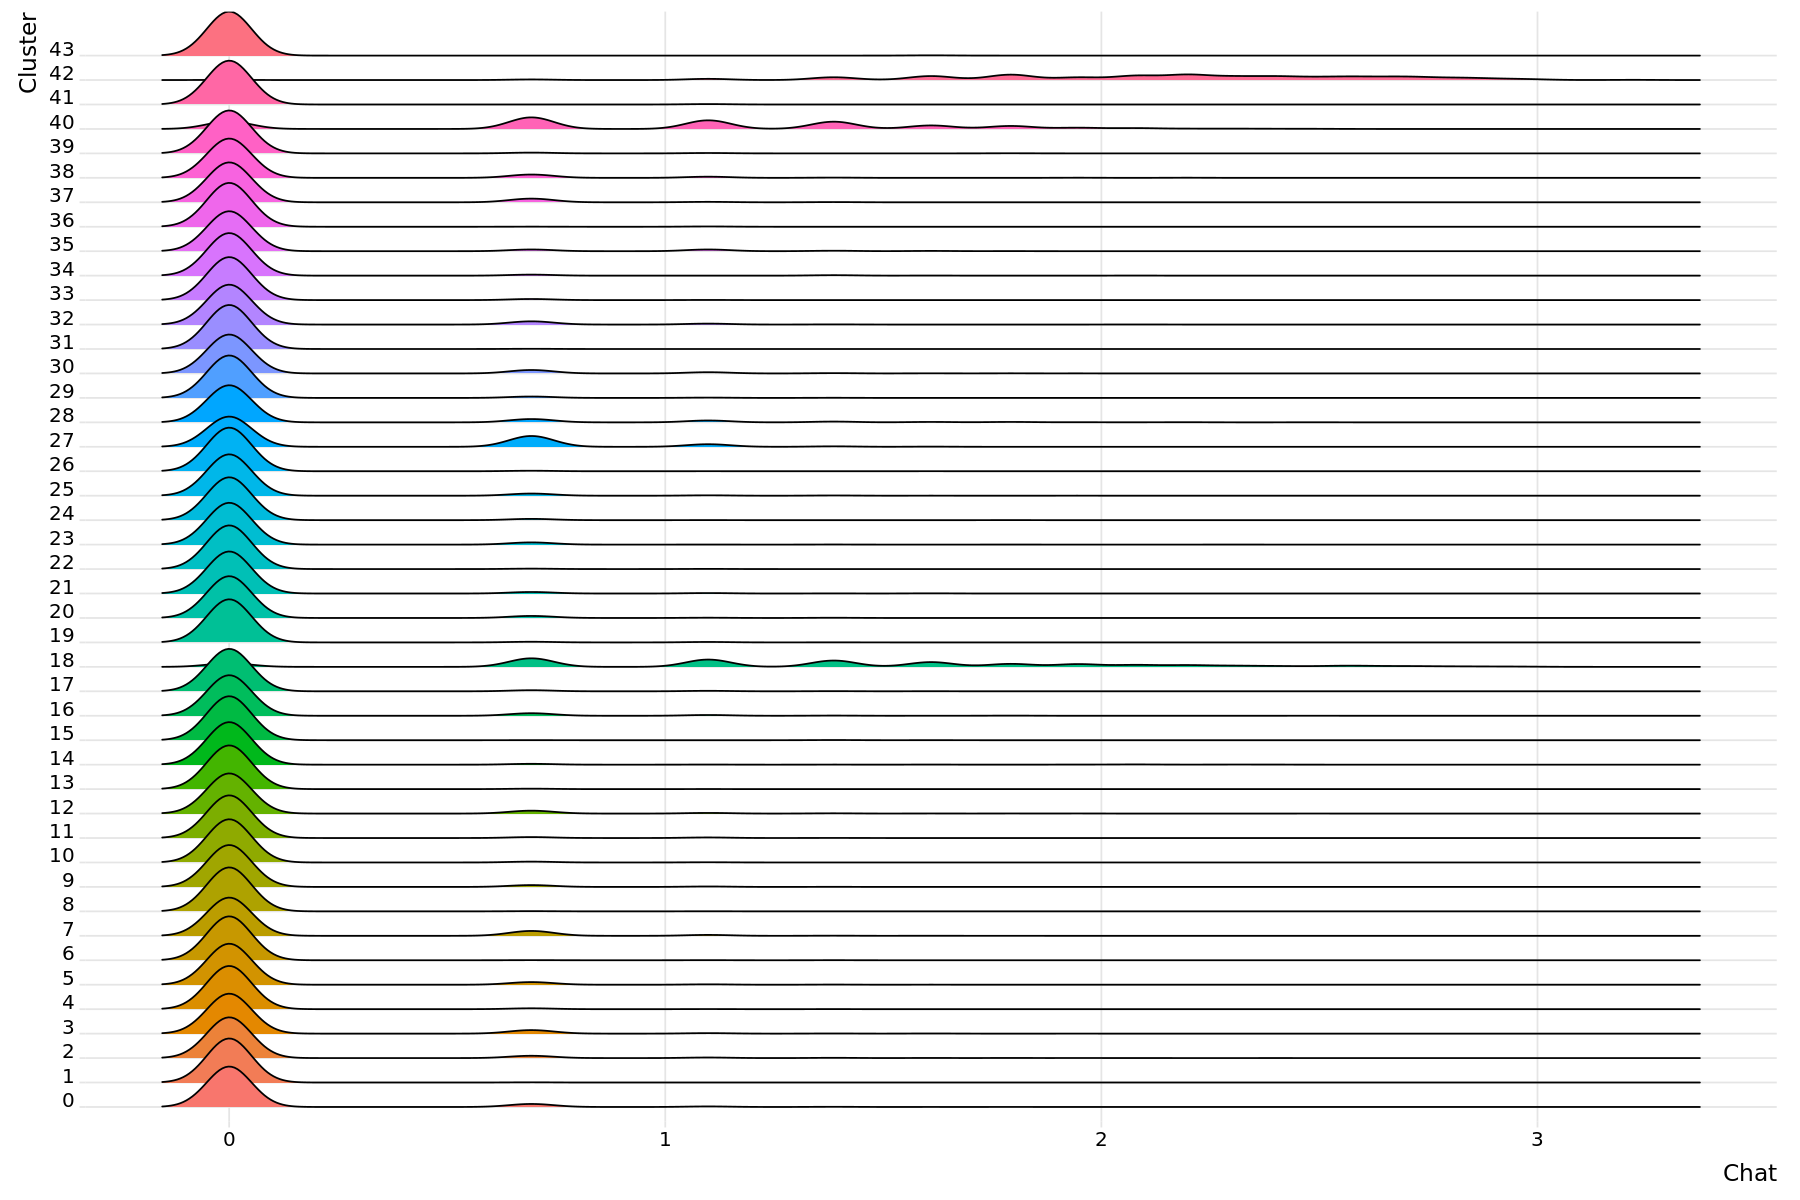

In [18]:
options(repr.plot.width =15, repr.plot.height =10)
ggplot(sub_xen, aes(x = Chat, y = Cluster, fill = Cluster)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none")



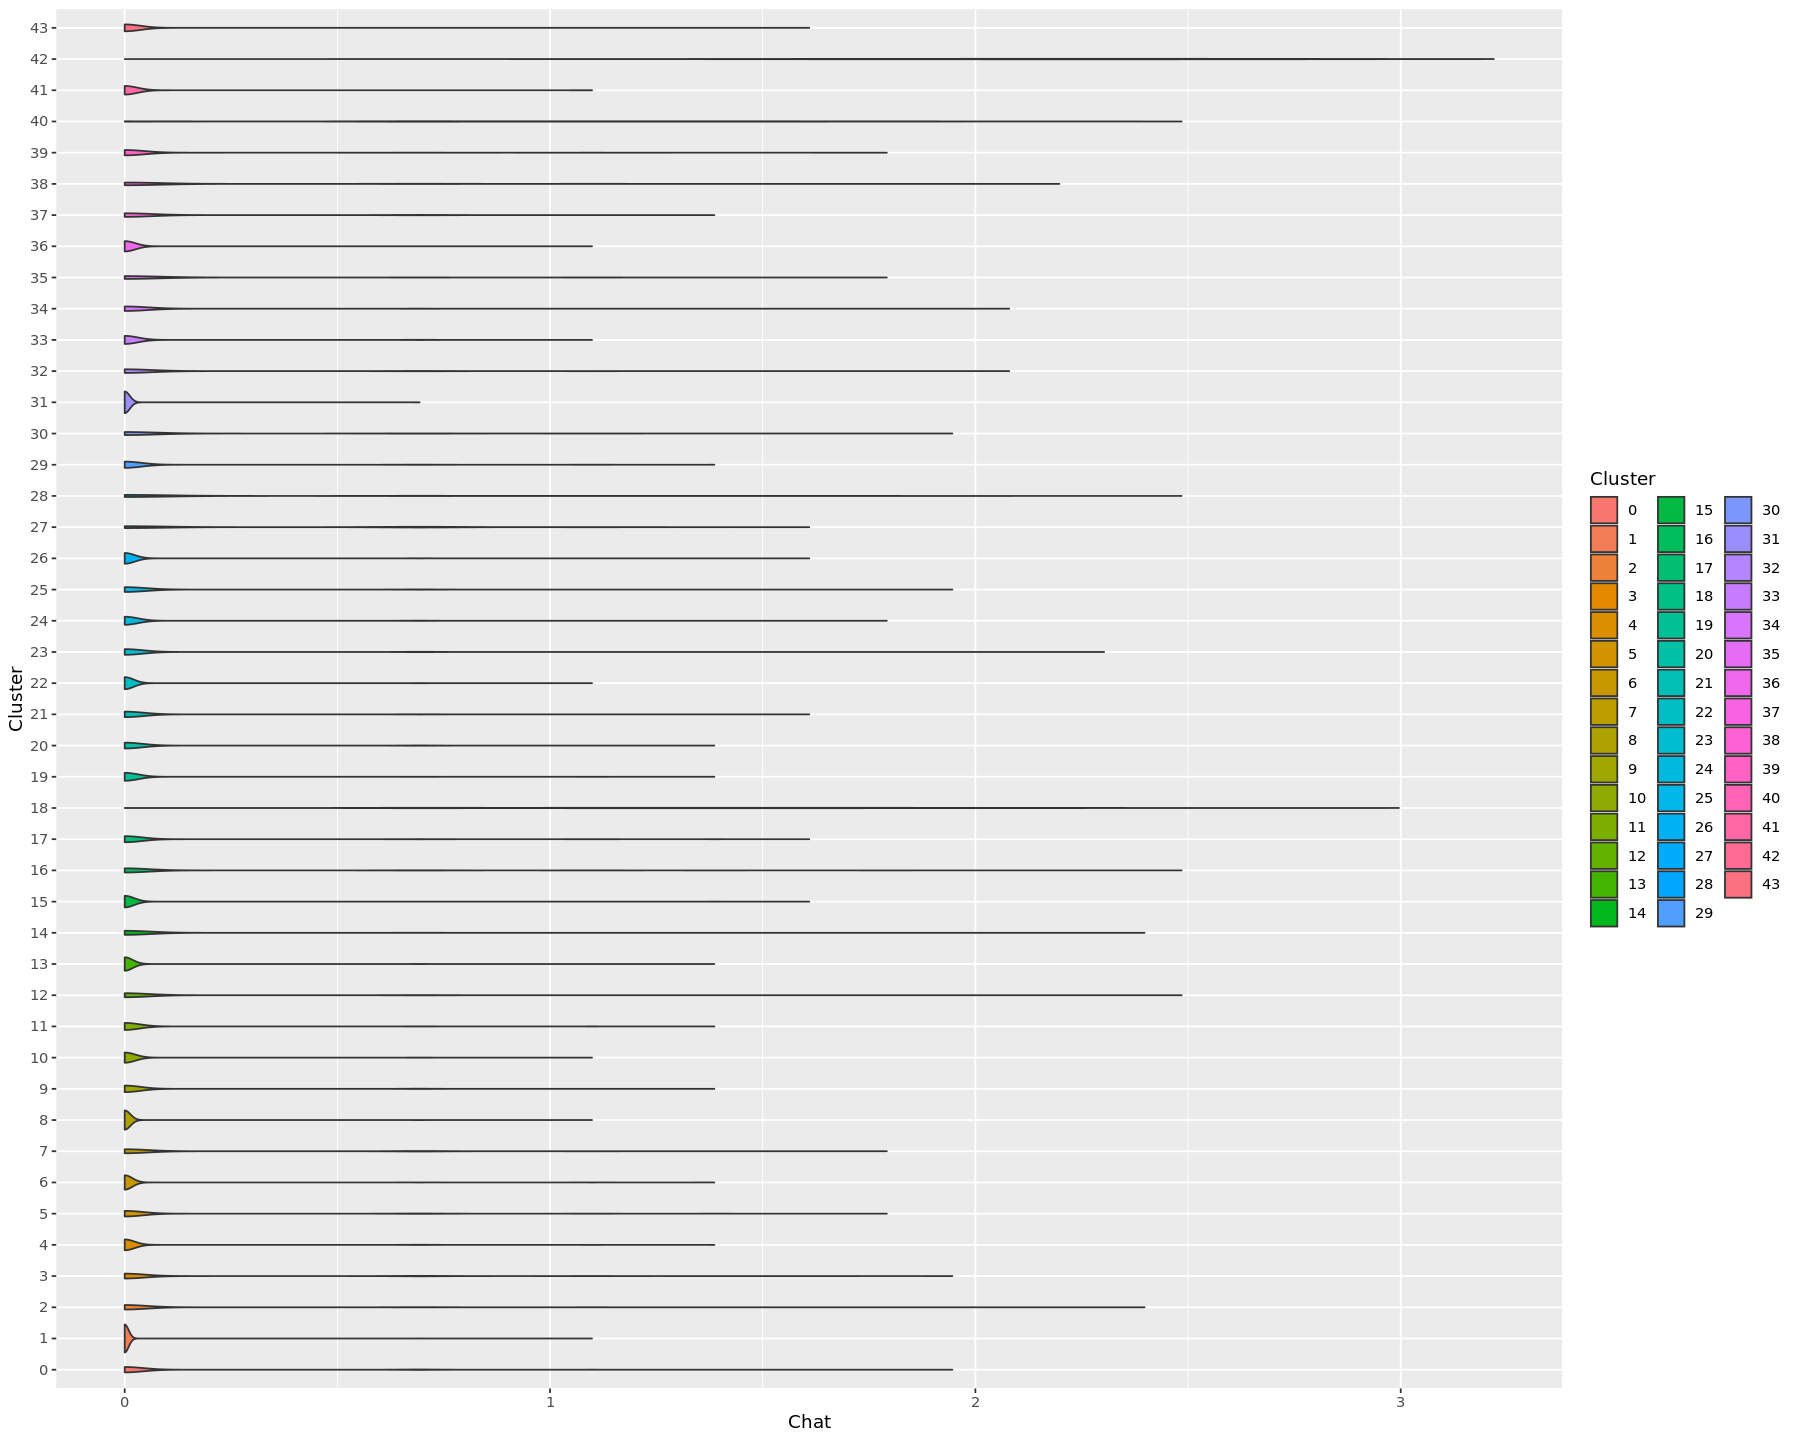

In [19]:
options(repr.plot.width =15, repr.plot.height =12)
ggplot(sub_xen, aes(x = Chat, y = Cluster, fill = Cluster)) +
  geom_violin()


# Similarly do the above process for the Prph and Nrp2 gnes which are marker genes for motor neurons

In [20]:
sub_xen$Prph <- xenium.obj[['SCT']]$data['Prph', ]

In [21]:
sub_xen

,Cluster,Chat,Prph
,<fct>,<dbl>,<dbl>
aaaaiehf-1,15,0,2.0794415
aaadggng-1,6,0,0.0000000
aaaeecmb-1,8,0,0.0000000
aaaegbdd-1,36,0,1.0986123
aaagakge-1,6,0,0.0000000
aaaimalc-1,21,0,0.6931472
aaaimkdl-1,8,0,0.0000000
aaajkfgn-1,4,0,0.0000000
aaakjmog-1,8,0,0.0000000


Picking joint bandwidth of 0.1



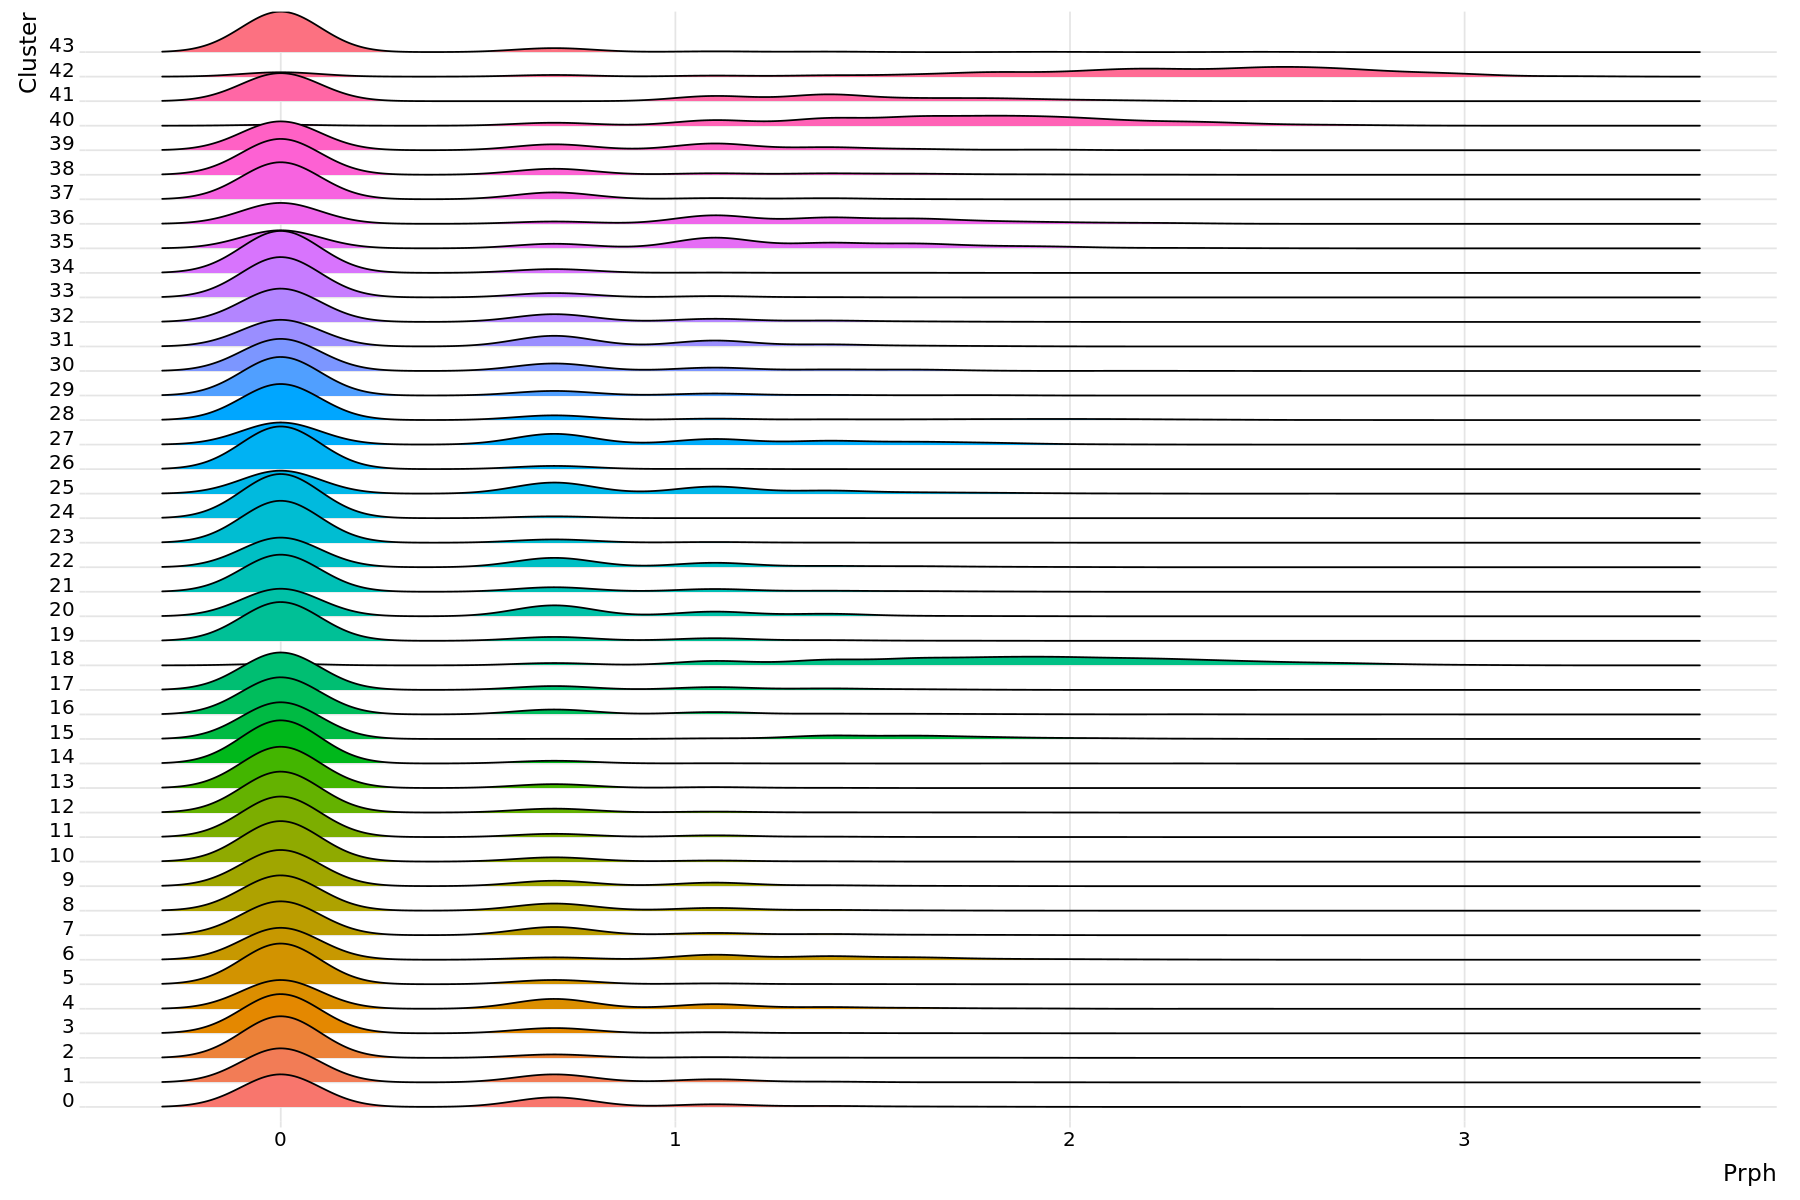

In [22]:
options(repr.plot.width =15, repr.plot.height =10)
ggplot(sub_xen, aes(x = Prph, y = Cluster, fill = Cluster)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none")



In [30]:
sub_xen$Nrp2 <- xenium.obj[['SCT']]$data['Nrp2', ]

Picking joint bandwidth of 0.114



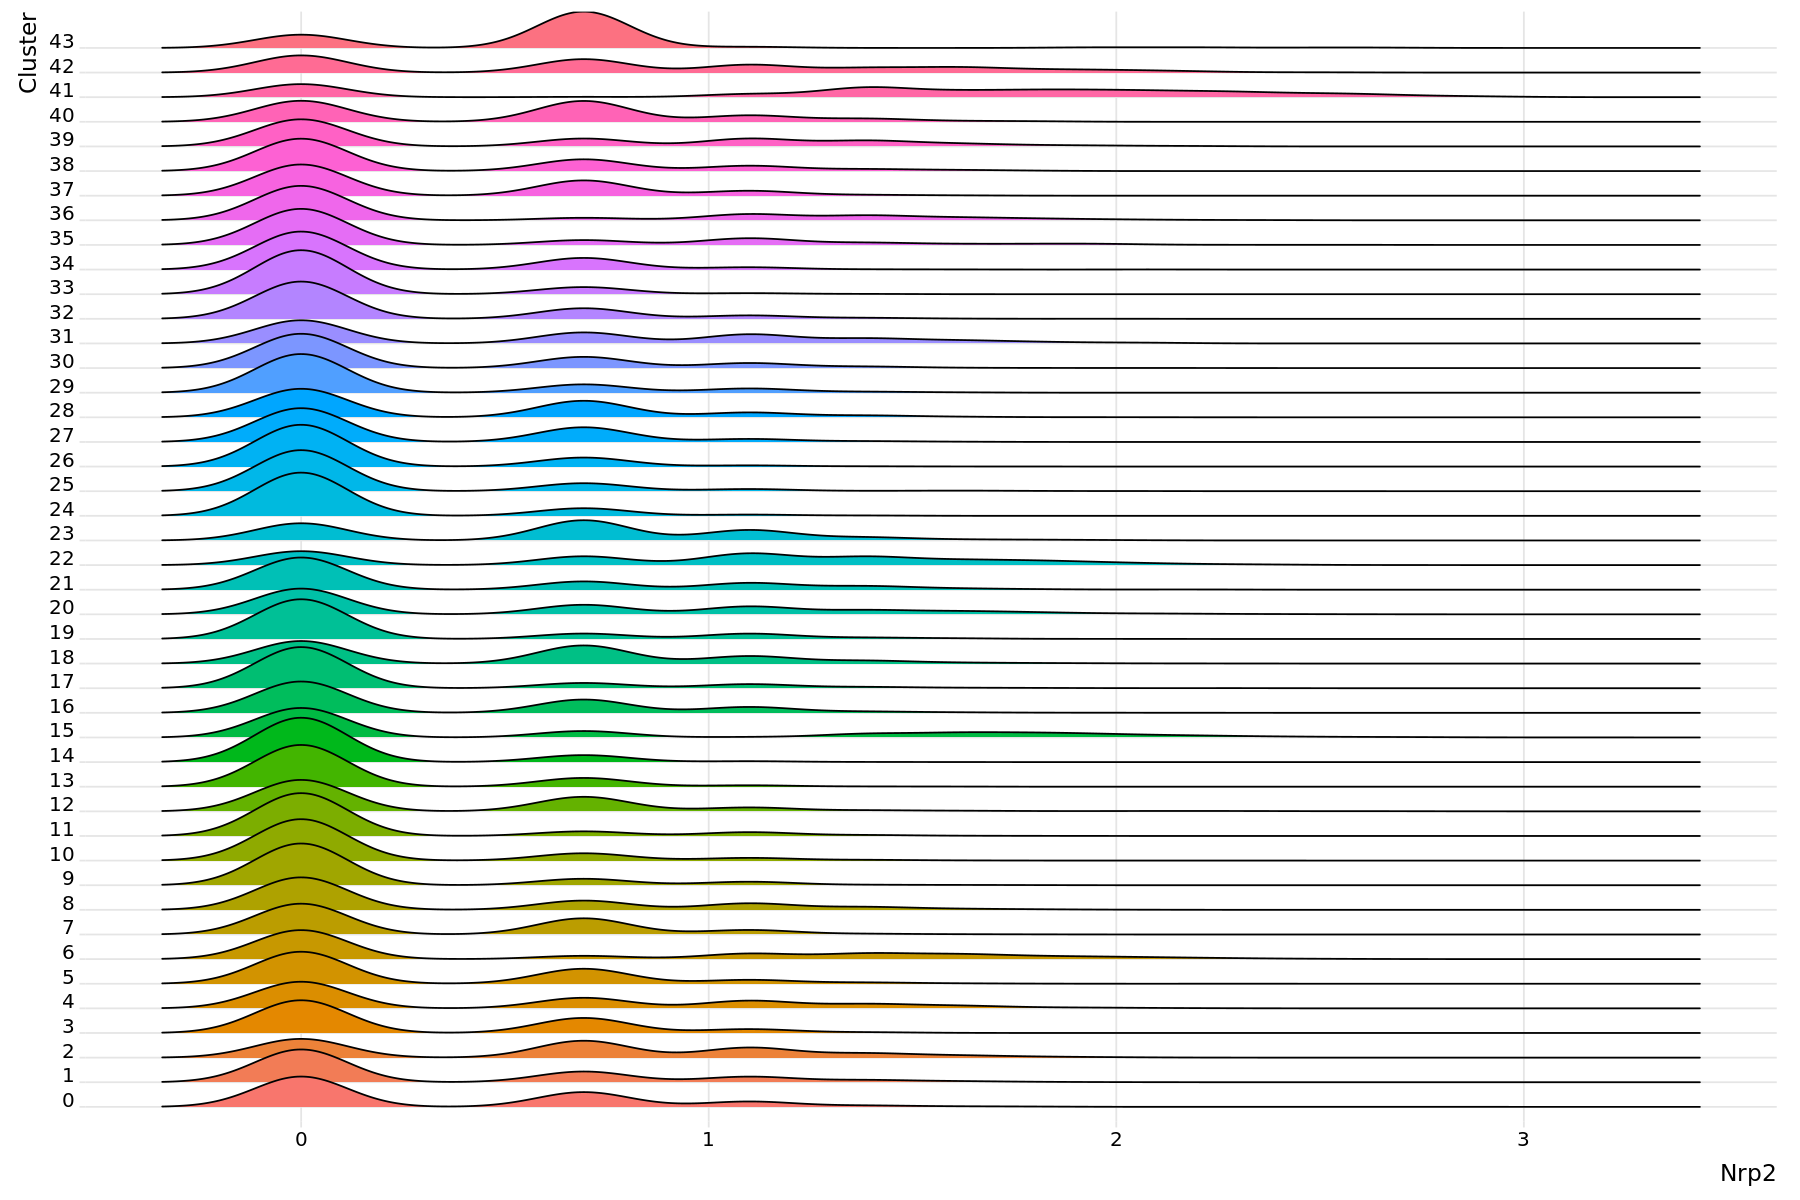

In [31]:
options(repr.plot.width =15, repr.plot.height =10)
ggplot(sub_xen, aes(x = Nrp2, y = Cluster, fill = Cluster)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none")

We can observe from above ridge plots that clusters 18,40,41,42 have high Chat,Prph,Nrp2 gene expression as compared to other clusters. To validate if these clusters really correspond to motor neurons spatially we visualize the ImageDimPlots of the clusters below

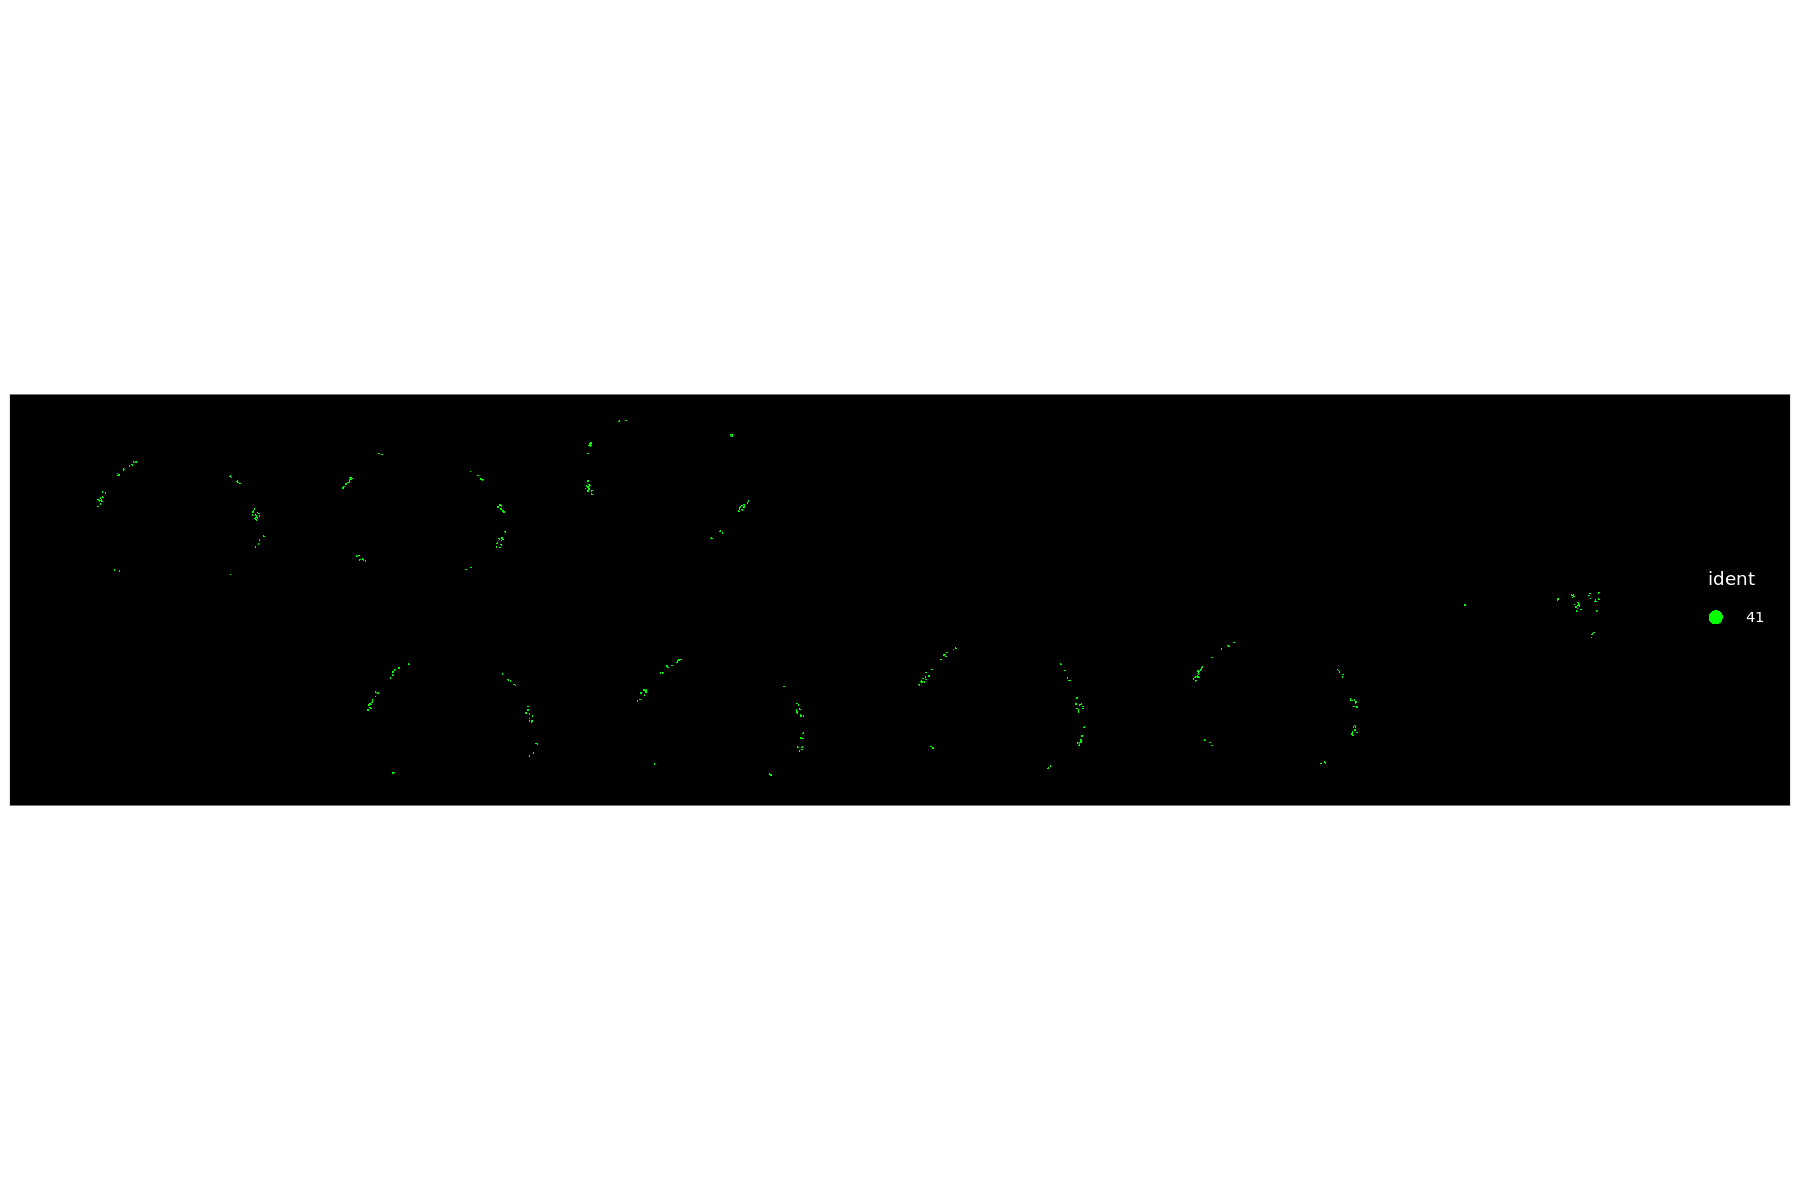

In [23]:
p2 <- ImageDimPlot(xenium.obj, fov = "fov", cols = "green", cells = WhichCells(xenium.obj, idents = 41))
p2

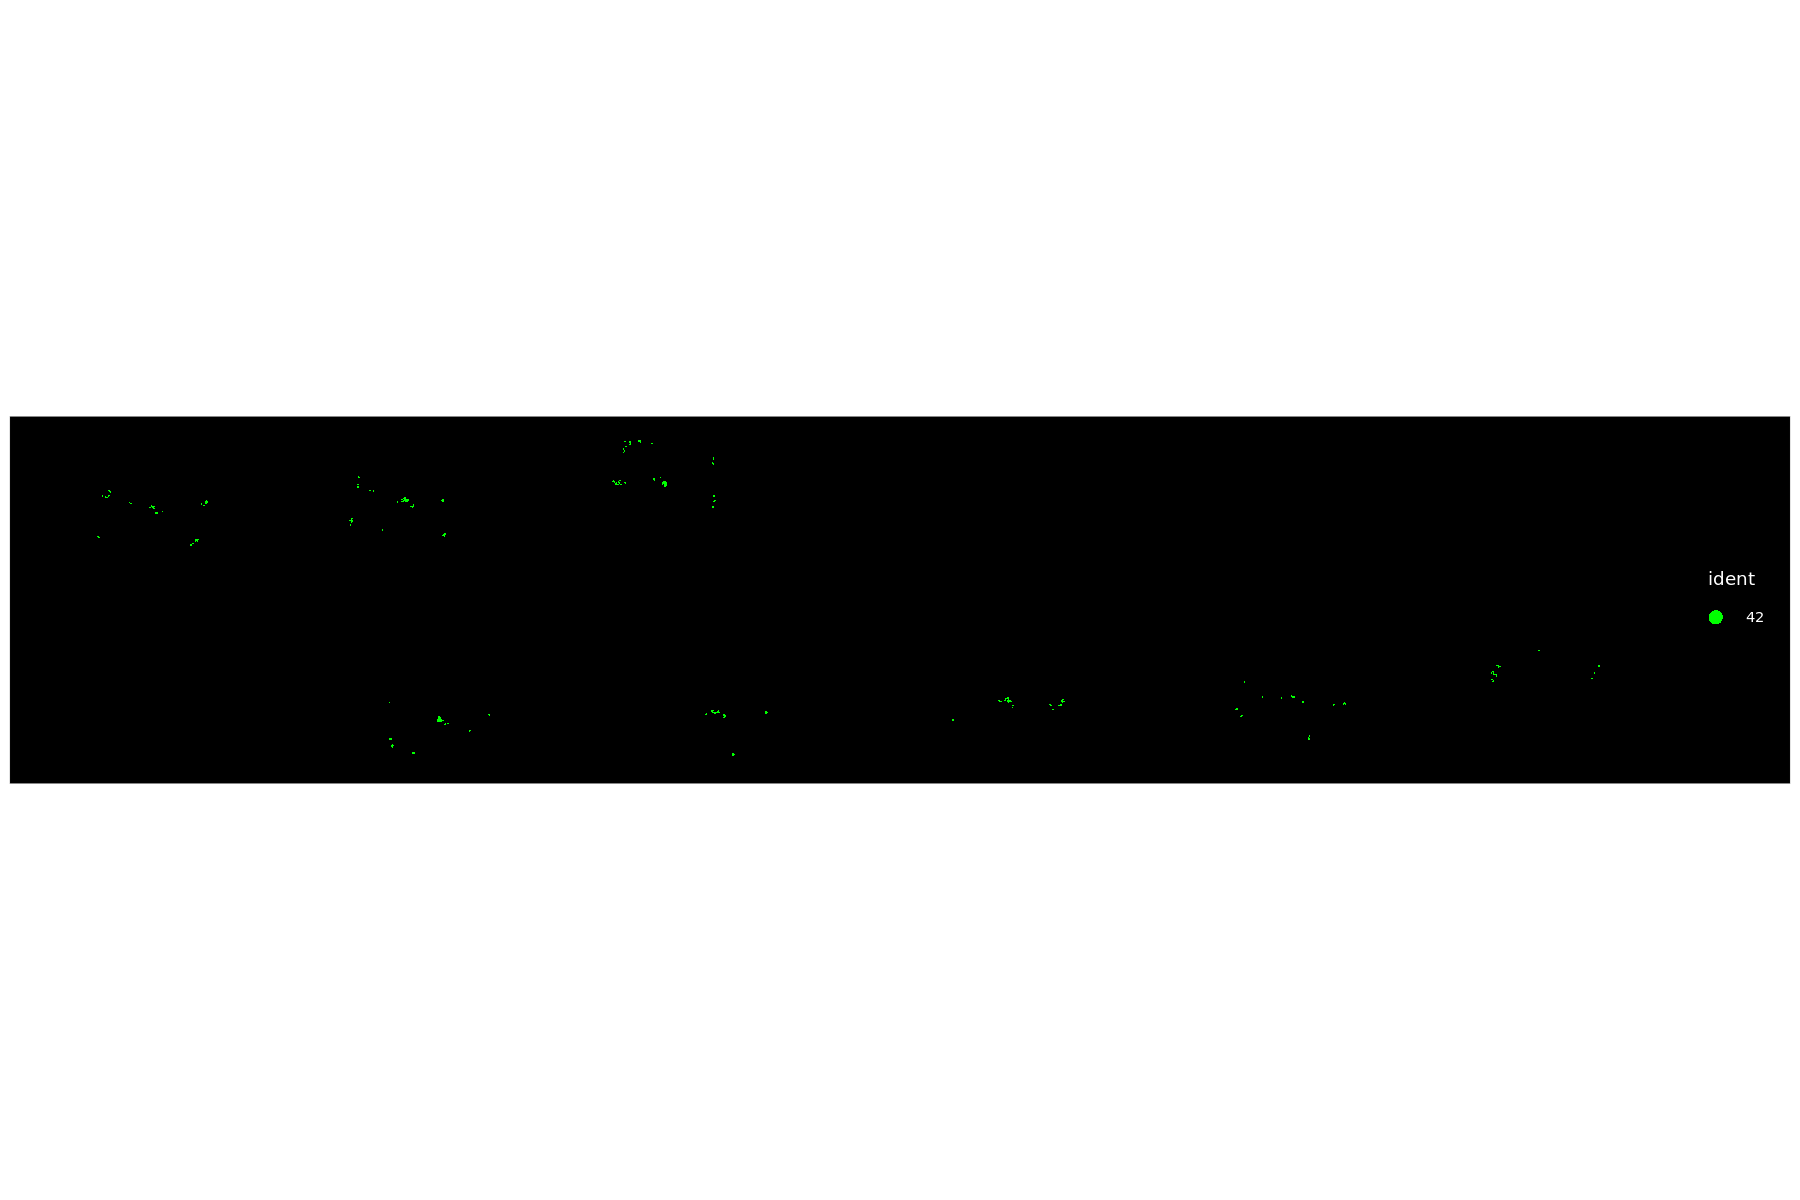

In [24]:
p1 <- ImageDimPlot(xenium.obj, fov = "fov", cols = "green", cells = WhichCells(xenium.obj, idents = 42))
p1

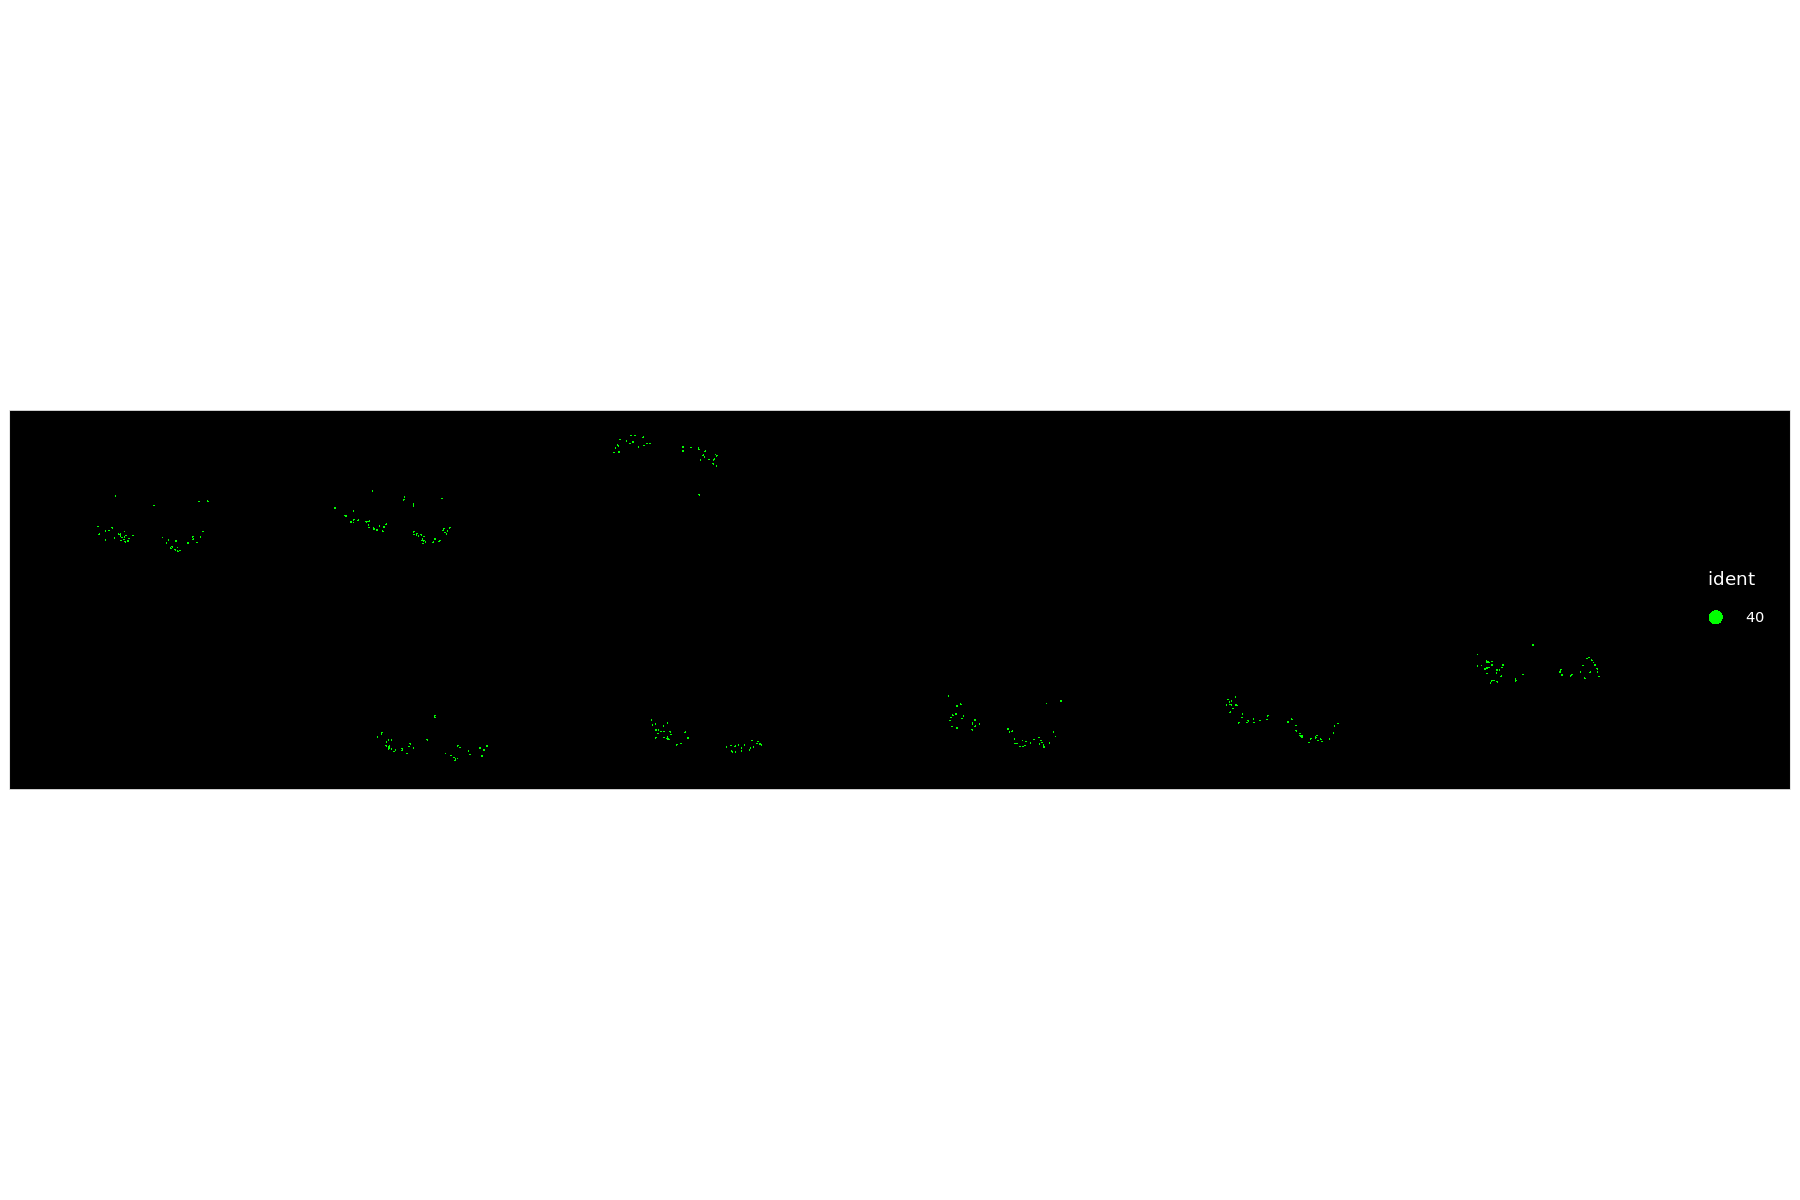

In [25]:
p3 <- ImageDimPlot(xenium.obj, fov = "fov", cols = "green", cells = WhichCells(xenium.obj, idents = 40))
p3

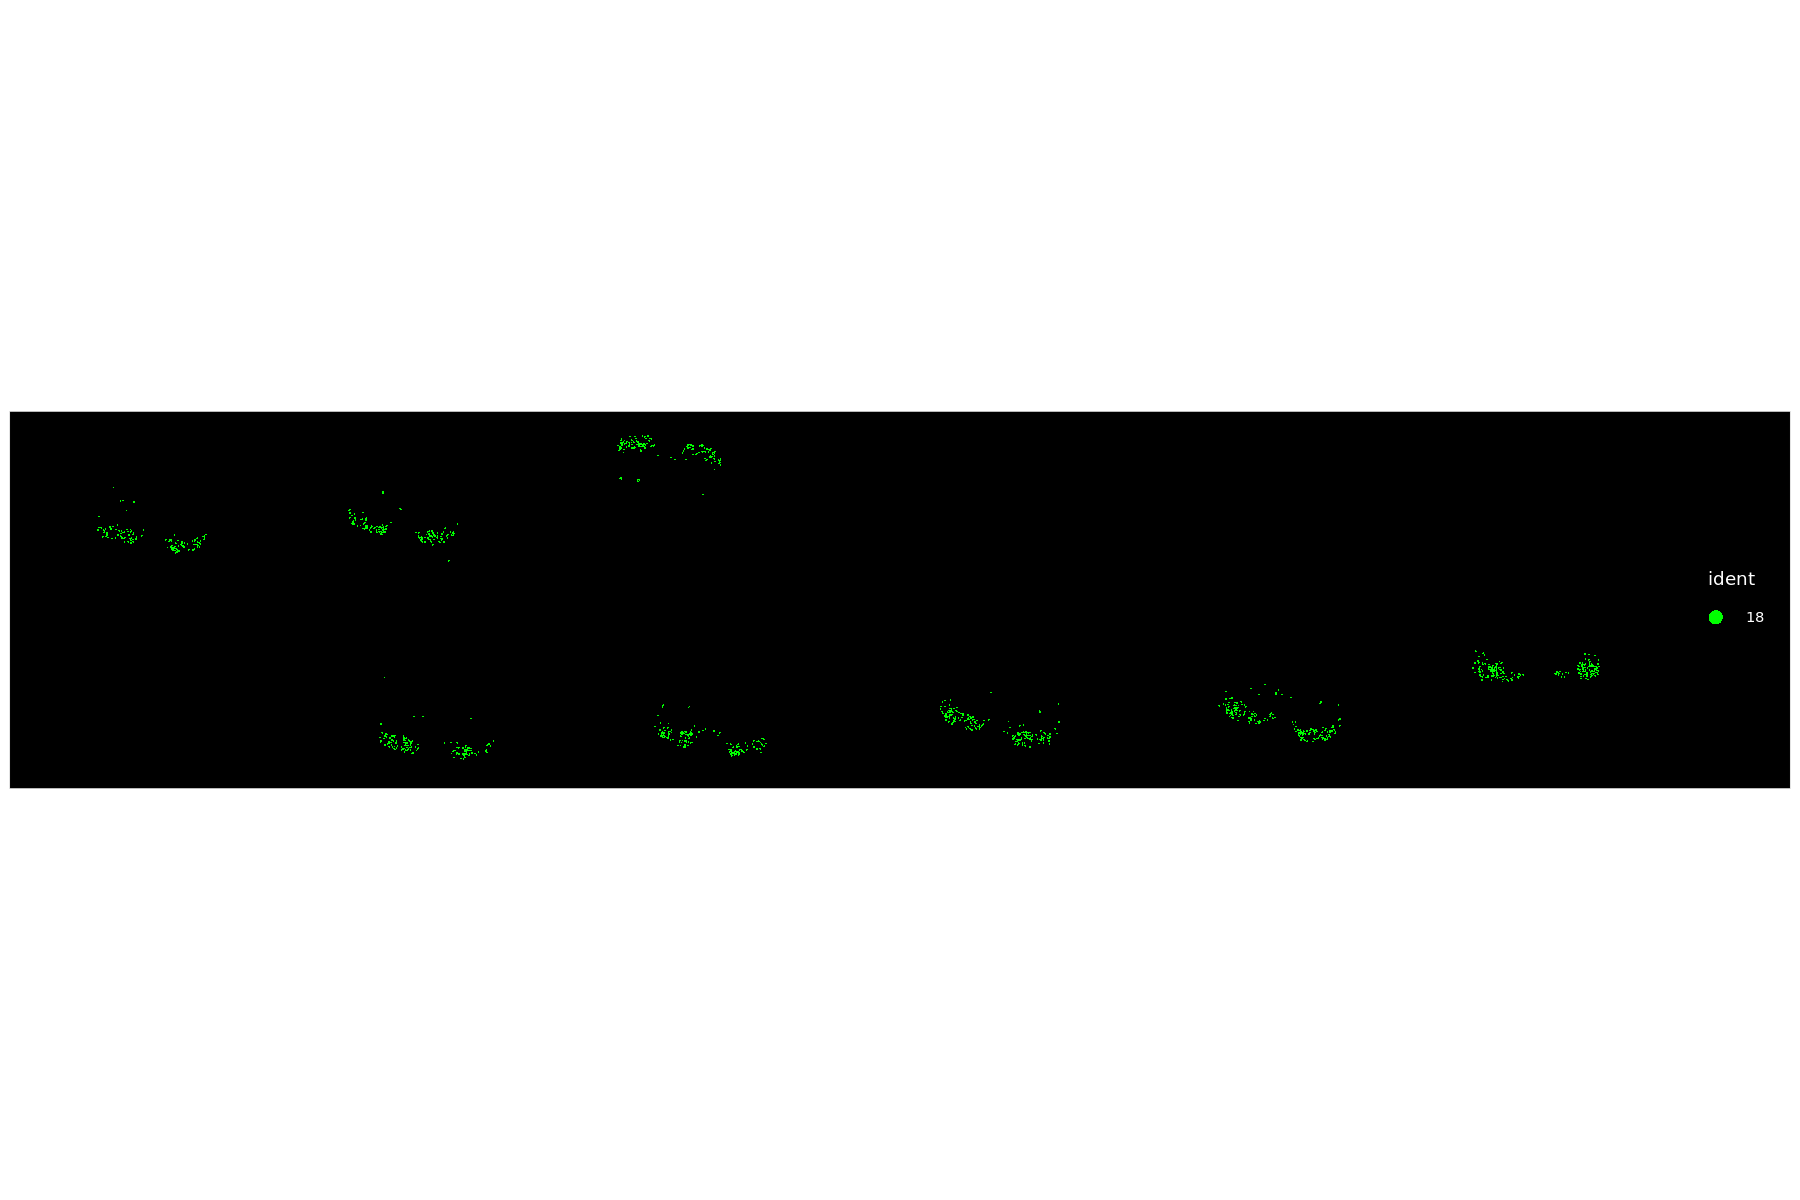

In [26]:
p4 <- ImageDimPlot(xenium.obj, fov = "fov", cols = "green", cells = WhichCells(xenium.obj, idents = 18))
p4

In the ImageDimPlot for Clusters 18 and 40, we observe that these clusters are predominantly located in the ventral horn of the spinal cord, the anatomical region where motor neurons are found. Therefore, the ridge plots confirm that these genes are reliable markers for motor neurons.

In the visualizations below, we observe that these marker genes are predominantly present in the ventral horn, reinforcing their reliability as marker genes for motor neurons.

In [27]:
p5 <- ImageFeaturePlot(xenium.obj, fov = "fov", features = "Chat")

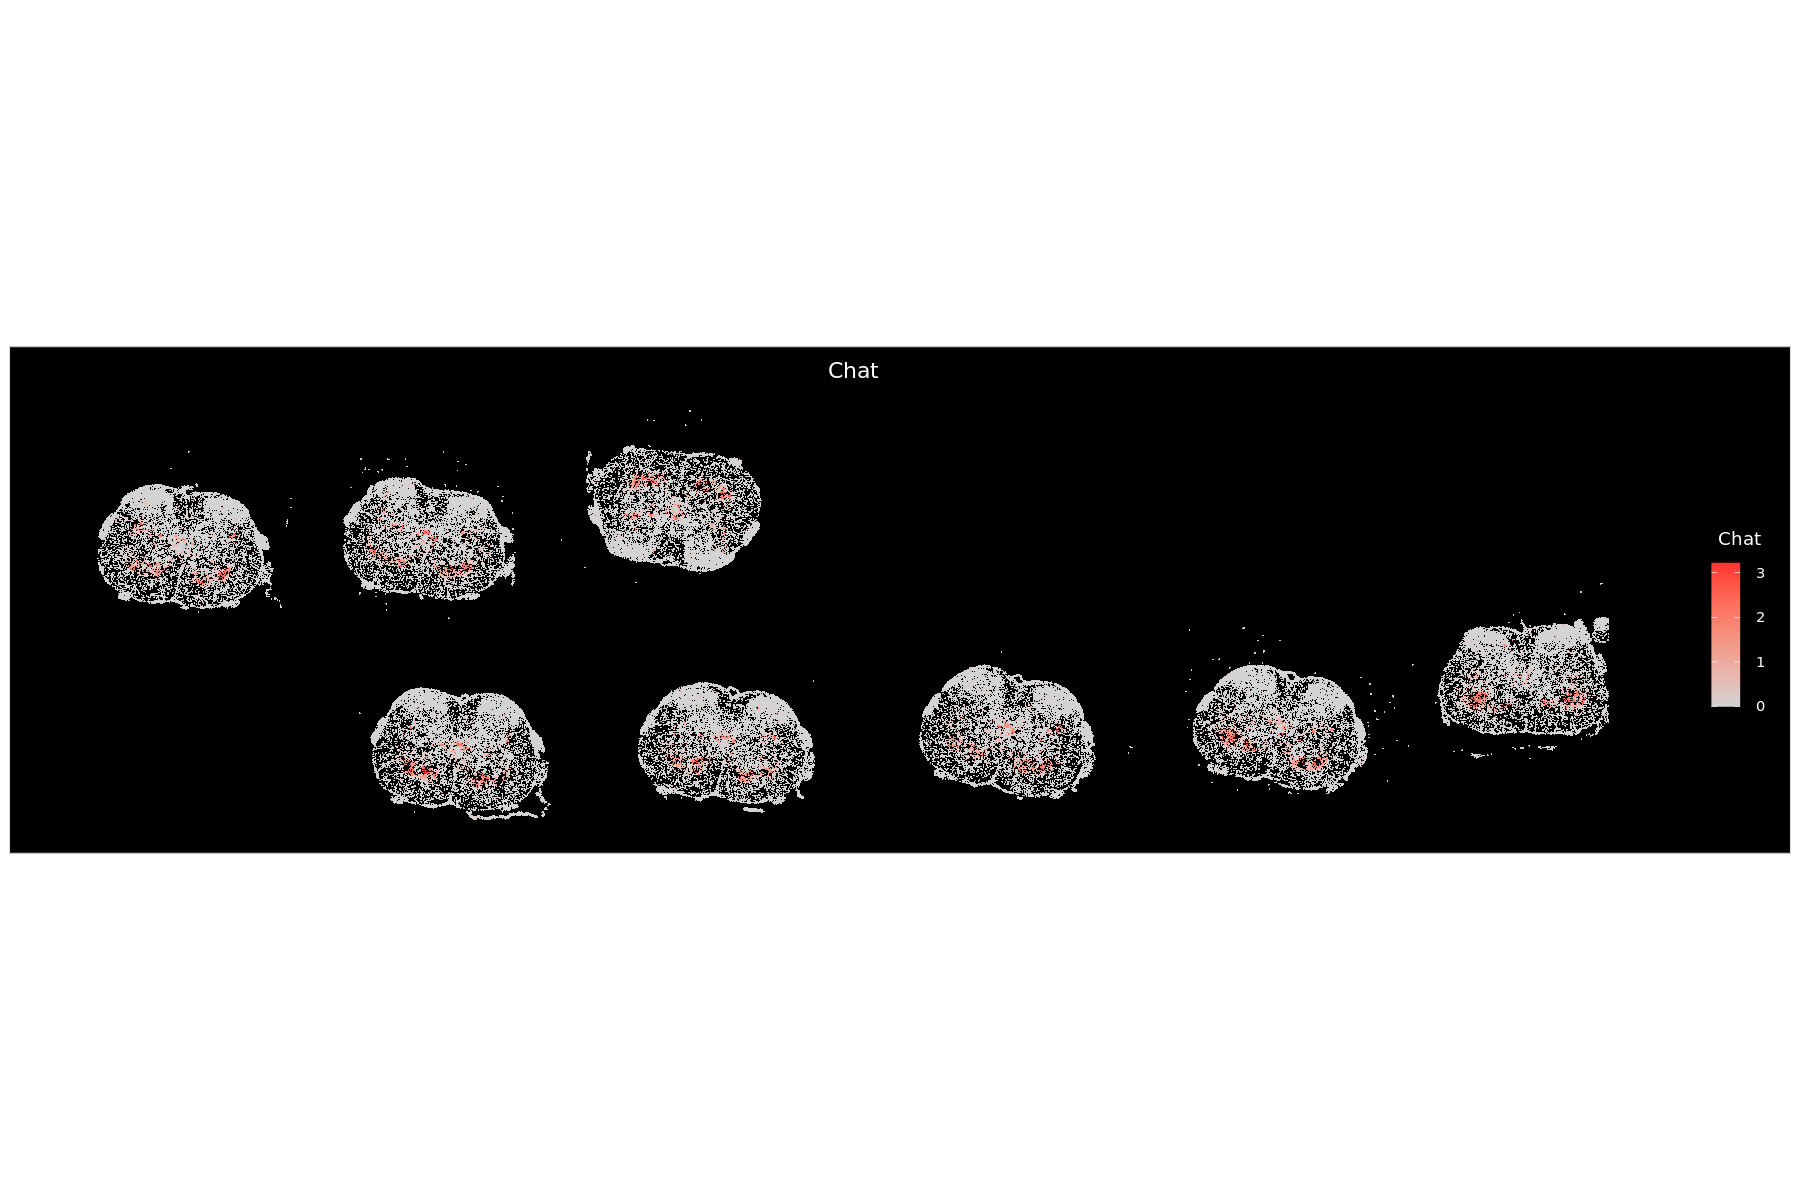

In [28]:
p5

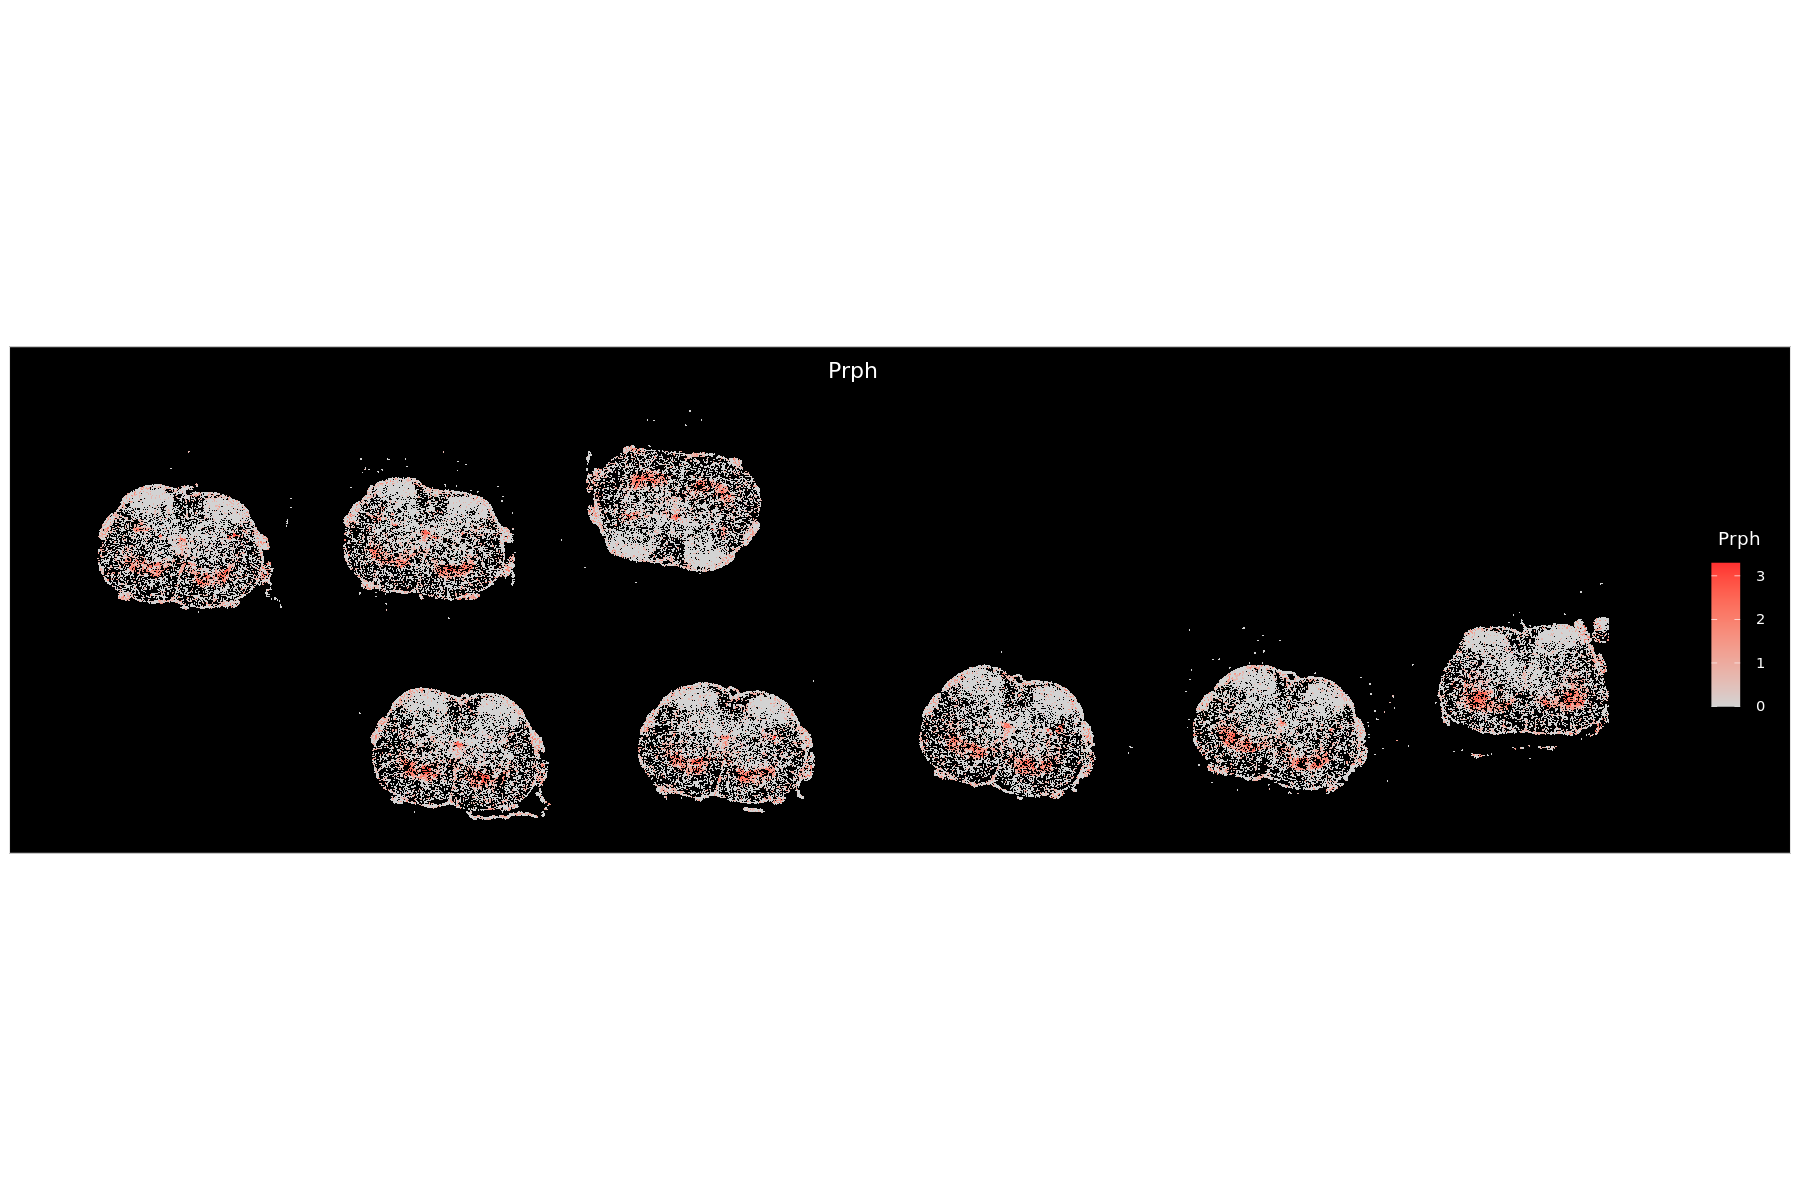

In [29]:
p6 <- ImageFeaturePlot(xenium.obj, fov = "fov", features = "Prph")
p6